### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [3]:
# Group by date and count the number of pickups
pickups_by_date=df.groupby(df['Date/Time'].dt.date).size()
print(pickups_by_date)

Date/Time
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
dtype: int64


In [4]:
# Find the date with the highest number of pickups
result=pickups_by_date.idxmax()
print(f'Highest number of pickups by date : {result}')
print(f'Highest number of pickup {pickups_by_date.max()}')

Highest number of pickups by date : 2014-08-07
Highest number of pickup 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [5]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
# Get the count of pickups on the highest date
print(f'Total number of pickups on the highest date {pickups_by_date.max()}')

Total number of pickups on the highest date 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [6]:
# Count the number of unique TLC base companies
print(f'unique TLC base companies {len(df.Base.unique())}')

unique TLC base companies 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [7]:
# Group by TLC base company and count the number of pickups
number_of_pickups=df.groupby(df['Base']).size()
print(f'Count of pickups on the basis of TLC base company {number_of_pickups.max()}')

Count of pickups on the basis of TLC base company 355803


In [8]:
# Find the TLC base company with the highest number of pickups
print(f'TLC base company with the highest number of pickups {number_of_pickups.idxmax()}')

TLC base company with the highest number of pickups B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [10]:
# Group by TLC base company and count the number of pickups
number_of_pickups=df.groupby(df['Base']).size()
print(f'Count of pickups on the basis of TLC base company {number_of_pickups.max()}')

Count of pickups on the basis of TLC base company 355803


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [11]:
# Extract the hour from the 'Date/Time' column
df["Hour"] = df["Date/Time"].dt.hour
# Group by hour and count the number of pickups
highest_number_of_pickups=df.groupby(df['Hour']).size()
# Find the hour with the highest number of pickups
result=highest_number_of_pickups.idxmax()
print('Business time of day for uber picksups (hour):',result)

Business time of day for uber picksups (hour): 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

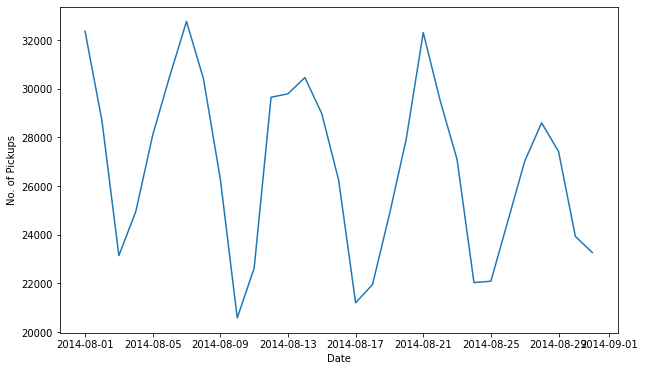

In [12]:
# Group by date and count the number of pickups
import matplotlib.pyplot as plt
pickup_counts = df.groupby(df['Date/Time'].dt.date).size()
pickup_counts.plot(kind='line',figsize=[10,6])
plt.xlabel("Date")
plt.ylabel("No. of Pickups")
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

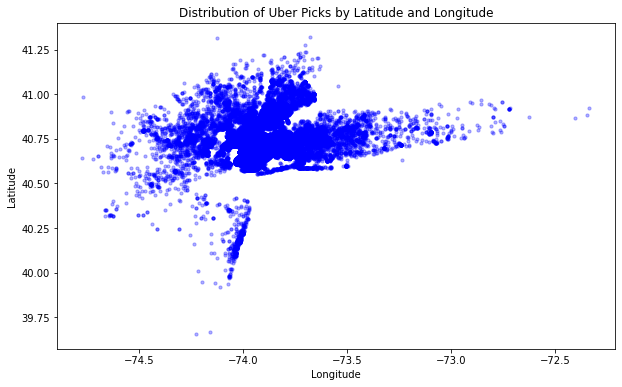

In [13]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10,6))
plt.scatter(df["Lon"], df["Lat"],s=10,alpha=0.3,color='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Distribution of Uber Picks by Latitude and Longitude')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

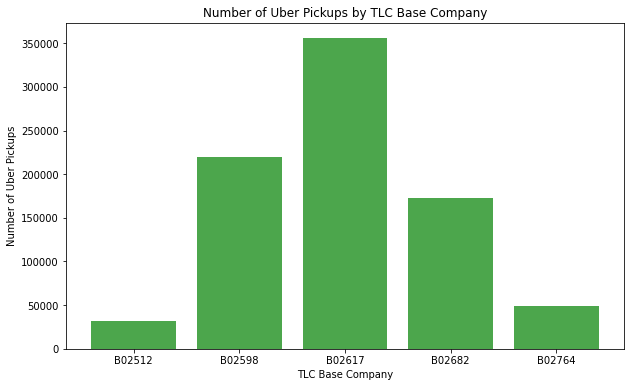

In [14]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickups_by_base = df.groupby("Base").size()
plt.figure(figsize=(10,6))
plt.bar(pickups_by_base.index, pickups_by_base.values,alpha=0.7,color='green')
plt.xlabel("TLC Base Company")
plt.ylabel("Number of Uber Pickups")
plt.title('Number of Uber Pickups by TLC Base Company')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage Distribution of Uber Pickups by day of the week')

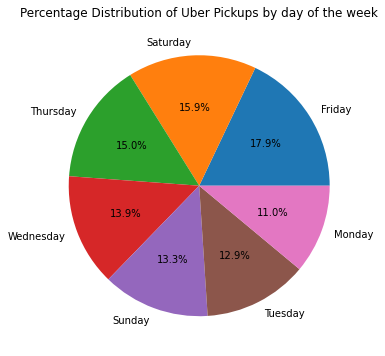

In [17]:
# Group by day of the week and count the number of pickups
plt.figure(figsize=(10,6))
pickups_by_day = df["Date/Time"].dt.day_name().value_counts()
plt.pie(pickups_by_day.values, labels=pickups_by_day.index,autopct='%1.1f%%')
plt.title('Percentage Distribution of Uber Pickups by day of the week')